In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Loading Images

In [2]:
chars = {
    'A': 0,
    'B': 1,
    'C': 2,
    'D': 3,
    'E': 4,
    'F': 5,
    'G': 6,
    'H': 7,
    'I': 8,
    'J': 9,
    'K': 10,
    'L': 11,
    'M': 12,
    'N': 13,
    'O': 14,
    'P': 15,
    'Q': 16,
    'R': 17,
    'S': 18,
    'T': 19,
    'U': 20,
    'V': 21,
    'W': 22,
    'X': 23,
    'Y': 24,
    'Z': 25,
    'nothing': 26
}

import os
import cv2
import numpy as np

img_size = 75

data_path = './data3'

available_keys = [key for key in chars.keys() if os.path.exists(os.path.join(data_path, key))]

X = []
Y = []

for key in available_keys:
    print(key)
    key_path = os.path.join(data_path, key)
    for img_file in os.listdir(key_path):
        img_path = os.path.join(key_path, img_file)
        img = cv2.resize(cv2.imread(img_path), (img_size, img_size), interpolation = cv2.INTER_AREA)
        X.append(img)
        Y.append(chars[key])

A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z
nothing


In [3]:
np.array(X).shape

(6666, 75, 75, 3)

In [4]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(np.array(X), np.array(Y), test_size=0.2)

In [5]:
unhot_test_Y = test_Y

train_Y = tf.one_hot(train_Y, len(chars)+1)
test_Y = tf.one_hot(test_Y, len(chars)+1)

(-0.5, 74.5, 74.5, -0.5)

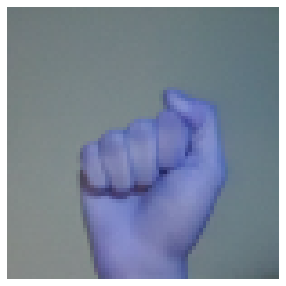

In [7]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,5))
plt.imshow(X[0])
plt.axis('off')

<AxesSubplot:xlabel='0'>

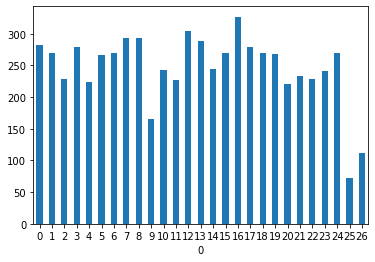

In [8]:
import pandas as pd

Y_df = pd.DataFrame(Y)

Y_df.value_counts(sort=False).plot.bar(rot=0, xticks=np.arange(len(available_keys)))

In [9]:
from tensorflow.keras.applications import InceptionResNetV2, VGG16

base_model = VGG16(include_top=False, input_shape=(img_size, img_size, 3))
base_model.trainable = False
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(base_model.output)
prediction_layer = tf.keras.layers.Dense(len(chars)+1, activation='softmax')(feature_batch_average)
model = tf.keras.Model(base_model.input, prediction_layer)

opt = tf.keras.optimizers.Adam(lr=0.0001)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(train_X)

In [11]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [14]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='./alice_checkpoints',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
history = model.fit(datagen.flow(train_X,train_Y, batch_size = 64), epochs=7, 
          validation_data = (np.array(test_X), np.array(test_Y)), 
          callbacks=[model_checkpoint_callback])
# history = model.fit(np.array(train_X),np.array(train_Y), epochs=10, 
#           validation_data = (np.array(test_X), np.array(test_Y)), 
#           callbacks=[model_checkpoint_callback])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 84 steps, validate on 1334 samples
Epoch 1/7
83/84 [============================>.] - ETA: 0s - loss: 0.1956 - accuracy: 0.9476WARNING:tensorflow:Can save best model only with val_acc available, skipping.


84/84 [==============================] - 15s 174ms/step - loss: 0.1939 - accuracy: 0.9479 - val_loss: 0.0667 - val_accuracy: 0.9828
Epoch 2/7
83/84 [============================>.] - ETA: 0s - loss: 0.1050 - accuracy: 0.9755WARNING:tensorflow:Can save best model only with val_acc available, skipping.


84/84 [==============================] - 10s 122ms/step - loss: 0.1065 - accuracy: 0.9756 - val_loss: 0.0515 - val_accuracy: 0.9828
Epoch 3/7
83/84 [============================>.] - ETA: 0s - loss: 0.0417 - accuracy: 0.9863WARNING:tensorflow:Can save best model only with val_acc available, skipping.


84/84 [==============================] - 10s 121ms/step - loss: 0.0420 - accuracy: 0.9863 - val_loss: 0.0278 - val_accuracy: 0.9925
Epoch 4/7
83/84 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9882WARNING:tensorflow:Can save best model only with val_acc available, skipping.


84/84 [==============================] - 10s 121ms/step - loss: 0.0356 - accuracy: 0.9882 - val_loss: 0.0134 - val_accuracy: 0.9963
Epoch 5/7
83/84 [============================>.] - ETA: 0s - loss: 0.0288 - accuracy: 0.9928WARNING:tensorflow:Can save best model only with val_acc available, skipping.


84/84 [==============================] - 10s 123ms/step - loss: 0.0286 - accuracy: 0.9927 - val_loss: 0.0146 - val_accuracy: 0.9978
Epoch 6/7
83/84 [============================>.] - ETA: 0s - loss: 0.0623 - accuracy: 0.9877WARNING:tensorflow:Can save best model only with val_acc available, skipping.


84/84 [==============================] - 10s 122ms/step - loss: 0.0660 - accuracy: 0.9874 - val_loss: 0.2821 - val_accuracy: 0.9618
Epoch 7/7
83/84 [============================>.] - ETA: 0s - loss: 0.0721 - accuracy: 0.9804WARNING:tensorflow:Can save best model only with val_acc available, skipping.


84/84 [==============================] - 10s 121ms/step - loss: 0.0713 - accuracy: 0.9807 - val_loss: 0.0127 - val_accuracy: 0.9963


In [15]:
import sklearn
print(np.array(test_Y).shape)
score = model.evaluate(test_X,test_Y, verbose=0)
print('\nKeras CNN - accuracy:', score[1], '\n')
prediction = model.predict(test_X)
print('\n', sklearn.metrics.classification_report(np.where(test_Y > 0)[1], np.argmax(prediction, axis=1), target_names=list(chars.keys())), sep='') 

(1334, 28)

Keras CNN - accuracy: 0.9962519 


              precision    recall  f1-score   support

           A       1.00      0.98      0.99        56
           B       1.00      1.00      1.00        45
           C       1.00      1.00      1.00        59
           D       1.00      1.00      1.00        57
           E       1.00      1.00      1.00        26
           F       1.00      1.00      1.00        55
           G       1.00      1.00      1.00        59
           H       1.00      1.00      1.00        61
           I       1.00      1.00      1.00        64
           J       1.00      1.00      1.00        39
           K       1.00      1.00      1.00        49
           L       1.00      1.00      1.00        39
           M       0.97      0.98      0.97        57
           N       1.00      0.96      0.98        53
           O       1.00      1.00      1.00        57
           P       1.00      1.00      1.00        55
           Q       1.00      1.00 

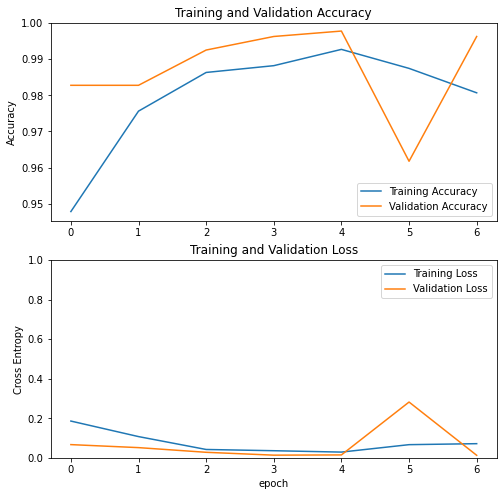

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


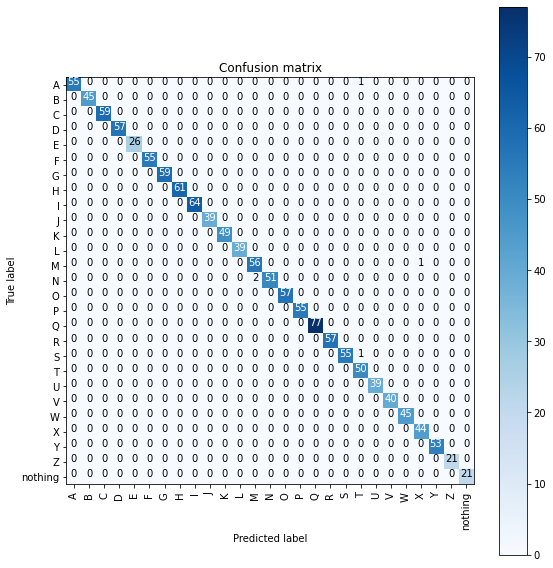

In [17]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    

confusion_mtx = confusion_matrix(unhot_test_Y, np.argmax(prediction, axis=1))
plot_confusion_matrix(confusion_mtx, classes = list(chars.keys()))

In [18]:
model.save('alicev3')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: alicev3\assets


INFO:tensorflow:Assets written to: alicev3\assets


In [13]:
from tensorflow.keras.models import load_model
model = load_model('alicev2')

In [25]:
test_X

array([[[[235,   8,   9],
         [194,  27,  26],
         [196,  25,  26],
         ...,
         [189,  17,  22],
         [189,  23,  25],
         [224,  21,  22]],

        [[193,  23,  28],
         [ 59,  87,  93],
         [ 73,  84, 101],
         ...,
         [ 59,  69,  85],
         [ 89, 111, 117],
         [166,  79,  81]],

        [[186,  19,  20],
         [ 43,  67,  72],
         [ 58,  69,  78],
         ...,
         [115, 119, 122],
         [118, 128, 120],
         [166,  81,  71]],

        ...,

        [[224,  49,  46],
         [170, 176, 166],
         [159, 164, 175],
         ...,
         [139, 126, 130],
         [131, 135, 131],
         [185,  84,  81]],

        [[227,  50,  45],
         [156, 178, 168],
         [147, 165, 180],
         ...,
         [123, 131, 124],
         [112, 139, 125],
         [172,  87,  78]],

        [[233,  31,  28],
         [195, 110, 105],
         [192, 103, 114],
         ...,
         [173,  78,  83],
        